Titanic dataset

Load the dataset into python environment

In [66]:
import pandas as pd
df=pd.read_csv('titanic_dataset.csv')

In [67]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. Make ‘PassengerId’ as the index column

In [70]:

df.set_index('PassengerId', inplace=True)# this is the code for set PassengerID as index column

KeyError: ignored

In [71]:
print(df.columns)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Here in the dataset, PassengerID is Index column . so in list of columns PassengerId not appeared so getting error while trying to index it

3. Check the basic details of the dataset

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [73]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Fill in all the missing values present in all the columns in the datase

Step 1: To fill all missing values first we have to identify which columns consist of null values

In [74]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

here column Age, Cabin and Embarked consist of null values

We can fill all missing values either by puting constant value or statistical values (mean , median or mode)

Filling with mean- column Age is Numerical column
Embarked column is consist of categorical values so we use mode
Cabin column is consist of both Numerical and categorical so filled with 'Unknown'

In [84]:
df_imputed=df.copy()
df_imputed['Age'] = df['Age'].fillna(df['Age'].mean())
df_imputed['Cabin'] = df['Cabin'].fillna('Unknown')
df_imputed['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

df_imputed.head(6)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q


In [85]:
df_imputed.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Filling all null values in all column with constant value

In [62]:
constant_value=0
df.fillna(constant_value,inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

Consideringb three columns for outlier analysis ('Age', 'Fare', 'SibSp')

Check and handling outliers in Age Column

<Axes: xlabel='Age'>

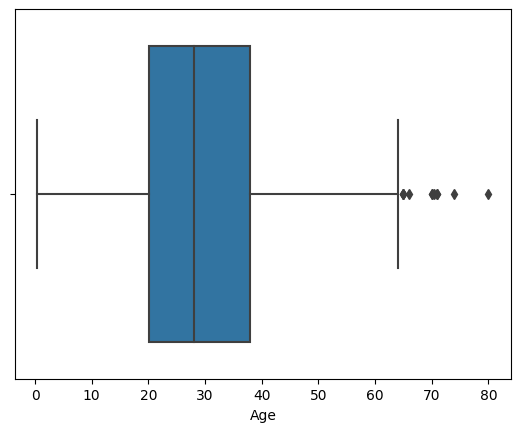

In [88]:
import seaborn as sns

sns.boxplot(x=df['Age'])

In [90]:

df_age = df['Age']

z_scores_age = (df_age - df_age.mean()) / df_age.std()

threshold = 3

# Identify potential outliers (Z-score > threshold or Z-score < -threshold)
outliers_age = df_age[abs(z_scores_age) > threshold]

# Print the potential outliers
print("Potential outliers in 'Age' column:")
print(outliers_age)

Potential outliers in 'Age' column:
PassengerId
631    80.0
852    74.0
Name: Age, dtype: float64


Check and Handling Fare column


<Axes: xlabel='Fare'>

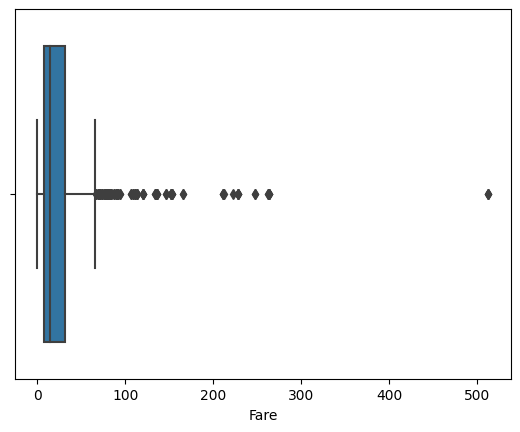

In [91]:
sns.boxplot(x=df['Fare'])

In [92]:
df_fare = df['Fare']

z_scores_fare = (df_fare - df_fare.mean()) / df_fare.std()

threshold = 3

outliers_fare = df_fare[abs(z_scores_fare) > threshold]


print(outliers_fare)

PassengerId
28     263.0000
89     263.0000
119    247.5208
259    512.3292
300    247.5208
312    262.3750
342    263.0000
378    211.5000
381    227.5250
439    263.0000
528    221.7792
558    227.5250
680    512.3292
690    211.3375
701    227.5250
717    227.5250
731    211.3375
738    512.3292
743    262.3750
780    211.3375
Name: Fare, dtype: float64


<Axes: xlabel='SibSp'>

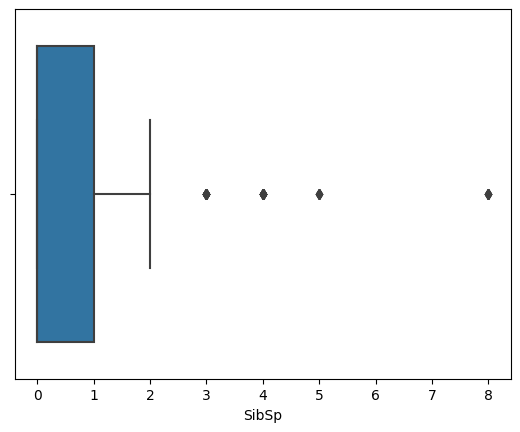

In [94]:
sns.boxplot(x=df['SibSp'])

In [95]:
df_sibsp = df['SibSp']

z_scores_sibsp = (df_sibsp - df_sibsp.mean()) / df_sibsp.std()


threshold = 3


outliers_sibsp = df_sibsp[abs(z_scores_sibsp) > threshold]


print(outliers_sibsp)

PassengerId
17     4
51     4
60     5
69     4
72     5
120    4
160    8
165    4
172    4
181    8
183    4
202    8
234    4
262    4
267    4
279    4
325    8
387    5
481    5
542    4
543    4
684    5
687    4
788    4
793    8
814    4
825    4
847    8
851    4
864    8
Name: SibSp, dtype: int64


Do min max scaling on the feature set (Take ‘Survived’ as target)


In [100]:

from sklearn.preprocessing import MinMaxScaler
X = df.select_dtypes(include=['number']).drop('Survived', axis=1)# Extract the feature set (excluding 'Survived' column)
y = df['Survived'] # Extract the target variable ('Survived' column)

# Apply MinMax scaling to the feature set
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the scaled feature set
print("Scaled Feature Set:")
print(X_scaled.head())

Scaled Feature Set:
   Pclass       Age  SibSp  Parch      Fare
0     1.0  0.271174  0.125    0.0  0.014151
1     0.0  0.472229  0.125    0.0  0.139136
2     1.0  0.321438  0.000    0.0  0.015469
3     0.0  0.434531  0.125    0.0  0.103644
4     1.0  0.434531  0.000    0.0  0.015713
